# Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


# Read and Explore Data


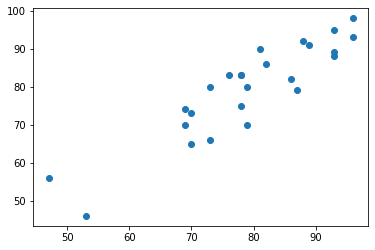

In [2]:
Data_points = np.genfromtxt("MultipleLR.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()



In [3]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)



# Generate Batches

In [4]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches



# Mini-Batch GD

In [5]:
theta = np.array([0 , 0 ])
alpha = 0.0001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter =0

Jtheta = []
theta_zero = []
theta_one = []

Max_no_iter = 4000
Batch_Size = 3
feture_Mini = Generate_Batches(feture , Batch_Size)
Y_mini = Generate_Batches(Y_Data , Batch_Size)

for j in range(Max_no_iter):
    for i in range(len(feture_Mini)):
        Y= np.dot(theta ,feture_Mini[i].T)
        Error_mini = Y-Y_mini[i]
        
        if (Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.00000001):
            break
        Not_first_iter +=1
        
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
        Jtheta.append((alpha/2*len(feture_Mini))*(np.dot(Error_mini ,Error_mini)))
        
        Gradt_mini = np.dot( Error_mini , feture_Mini[i]) 
        theta = theta - (alpha/len(feture_Mini))*Gradt_mini
        
print(theta)   



[0.17360831 1.00910578]


# Adam Algorithm use MiniBatch

In [6]:
theta = np.array([0 , 0 ])
alpha = 0.1

Epoch = 100

Not_first_iter = 0
Jtheta = []
theta_zero = []
theta_one = []

Max_no_iter = 10000

Mt = 0
Vt = 0
Mt_hat = 0
Vt_hat = 0
epslon = 1e-8
Beta_1 = 0.2
Beta_2 = 0.9

Batch_Size = 3
feture_Mini = Generate_Batches(feture , Batch_Size)
Y_mini = Generate_Batches(Y_Data , Batch_Size)

Data_length = len(feture_Mini)
for i in range(Max_no_iter):
    for i in range(len(feture_Mini)):
        Y= np.dot(theta ,feture_Mini[i].T)
        Error = Y - Y_mini[i]

        if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.01:
                break
        Not_first_iter+=1 
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
        Jtheta.append((alpha/2)*(np.dot( Error , Error)/Data_length))

        Gradt = (np.dot( Error , feture_Mini[i]) /Data_length)


        Mt = Beta_1*Mt + (1-Beta_1)*Gradt
        Vt = Beta_2*Vt + (1-Beta_2)*np.square(Gradt)
        Mt_hat = Mt/(1-Beta_1)
        Vt_hat = Vt/(1-Beta_2)
        theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat
    
    
print(theta) 

[1.05759615 1.0167204 ]


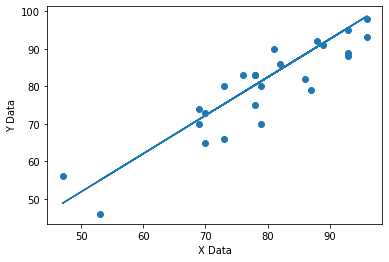

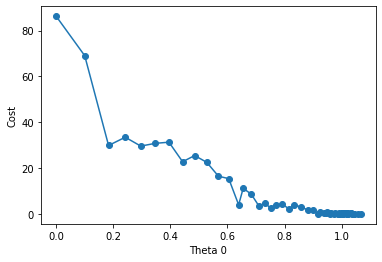

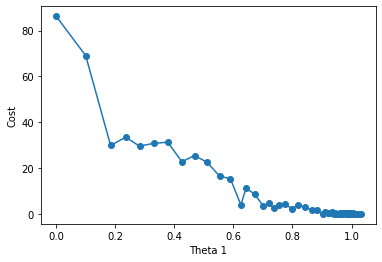

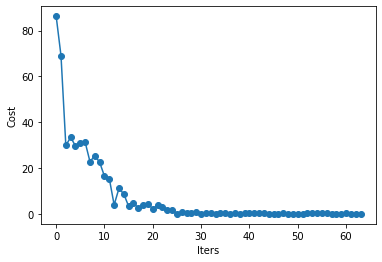

In [7]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()